In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("data/train.csv")

In [5]:
data.describe()

,id,feature_AA,feature_AB,feature_BA,feature_BB,feature_CA,feature_CB,Temperature
count,64320.000000,64320.000000,64320.000000,64320.000000,64320.000000,64320.000000,64320.000000,64320.000000
mean,32159.500000,7.522545,2.142897,4.478698,0.820356,3.042537,0.819362,13.610430
std,18567.728994,6.914888,2.023449,6.669074,1.818778,1.169700,0.602287,8.827735
min,0.000000,-21.568001,-5.693000,-23.986000,-6.041000,-1.188000,-1.371000,-4.221000
25%,16079.750000,5.961000,0.670000,3.553000,-0.391000,2.284000,0.640000,6.753000
50%,32159.500000,8.841000,2.076000,6.041000,0.853000,2.802000,0.944000,11.959000
75%,48239.250000,11.721000,3.550000,8.635000,2.132000,3.594000,1.157000,18.712000
max,64319.000000,24.180000,10.315000,18.087000,7.853000,8.498000,3.046000,46.007000


<Axes: >

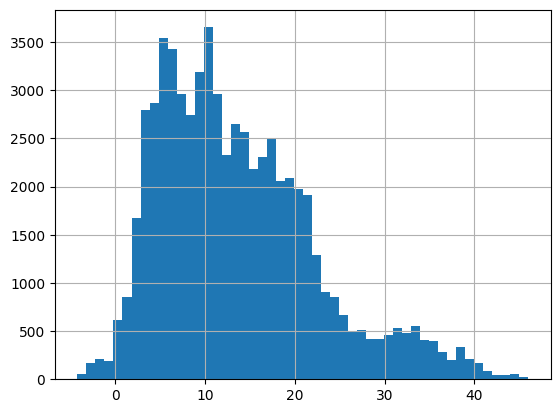

In [8]:
data.Temperature.hist(bins=50)